In [1]:
# Pandas
import pandas as pd 

# Numpy
import numpy as np # linear algebra

# matplotlib
import matplotlib.pyplot as plt

# Ipython tool for figsize
from IPython.core.pylabtools import figsize

# train test split
from sklearn.model_selection import train_test_split

# Pipeline
from sklearn.pipeline import Pipeline

# DictVectorizer
from sklearn.feature_extraction import DictVectorizer


# XGB
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# cross_val_score
from sklearn.model_selection import cross_val_score

# DataframeMapper, CategoricalImputer
from sklearn_pandas import DataFrameMapper, CategoricalImputer

# Imputer
from sklearn.preprocessing import Imputer


# FeatureUnion
from sklearn.pipeline import FeatureUnion

# Function Transformer
from sklearn.preprocessing import FunctionTransformer

# ROC AUC
from sklearn.metrics import roc_auc_score, roc_curve

#from sklearn import impute
from sklearn import metrics
from scipy.stats import chisquare
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#decision tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
import seaborn as sns
sns.set()

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 as sklearn_chi2

# Import label encoder 
from sklearn import preprocessing

In [2]:
data_frame = pd.read_csv("../input/(survey)Worksheet 2.csv")

In [3]:
data_frame.head(4)

,gender,nationality,placeOfBirth,department,batch,semester,section,lastSemesterGradePoint,questionsAskInTheClassroom,questionsAskedInTheClassroom,goThroughCourseMaterials,goThroughCourseMaterial,meetWithAcademicAdviser,groupStudyHours,studentAbsenceDays,parentsSatisfaction,educationStatusofParents,Class
0,M,Bangladesh,Dhaka,SWE,16,Summer,A,3.66,M,10,L,24,3,10,5,Yes,Above HSC,M
1,M,Bangladesh,Munshiganj,SWE,17,Summer,B,2.25,M,8,M,118,4,30,19,Yes,Above HSC,L
2,M,Bangladesh,Cumilla,SWE,17,Spring,A,3.25,M,5,M,12,2,4,2,Yes,HSC,L
3,F,Bangladesh,Dhaka,SWE,18,Summer,B,3.50,M,2,M,11,2,3,7,No,Above HSC,M


In [4]:
print (data_frame.isnull().values.any())

False


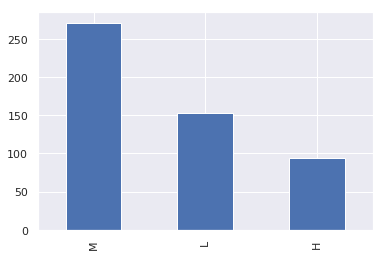

In [5]:
data_frame["Class"].value_counts().plot.bar()

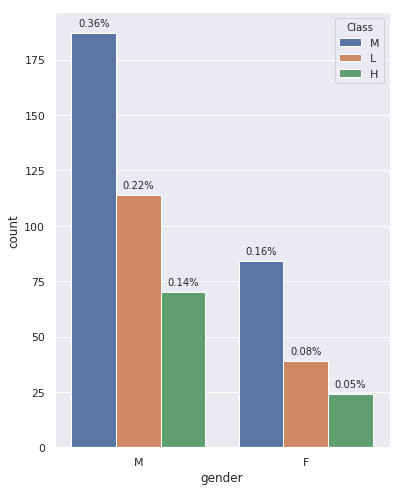

In [6]:
plt.figure(figsize=(6, 8))
ax = sns.countplot(data = data_frame, x = "gender", hue = "Class")

for p in ax.patches:
        height = p.get_height()
        ax.text(
                p.get_x()+p.get_width()/2.,
                height + 3,
                "{:1.2f}%".format(height/len(data_frame),0),
                ha = "center", rotation = 0
               ) 

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


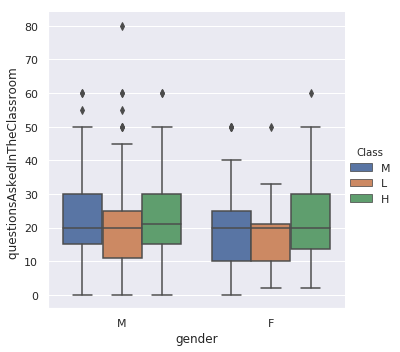

In [7]:
sns.factorplot(x = "gender", y = "questionsAskedInTheClassroom ", hue = "Class", data = data_frame, kind = "box")

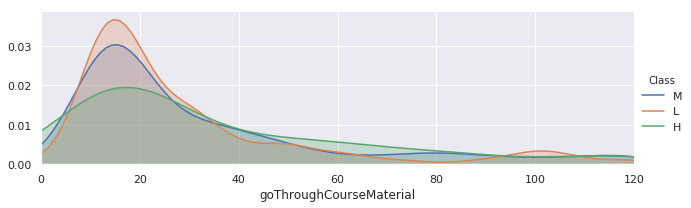

In [8]:
facet = sns.FacetGrid(data_frame, hue = "Class", aspect = 3)
facet.map(sns.kdeplot,"goThroughCourseMaterial",shade= True)
facet.set(xlim=(0, data_frame["goThroughCourseMaterial"].max()))
facet.add_legend()

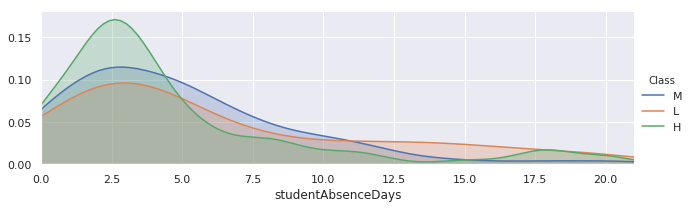

In [9]:
facet = sns.FacetGrid(data_frame, hue = "Class", aspect = 3)
facet.map(sns.kdeplot,"studentAbsenceDays",shade= True)
facet.set(xlim=(0, data_frame["studentAbsenceDays"].max()))
facet.add_legend()



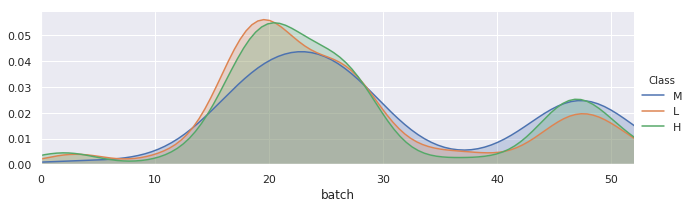

In [10]:
facet = sns.FacetGrid(data_frame, hue = "Class", aspect = 3)
facet.map(sns.kdeplot,"batch",shade= True)
facet.set(xlim=(0, data_frame["batch"].max()))
facet.add_legend()

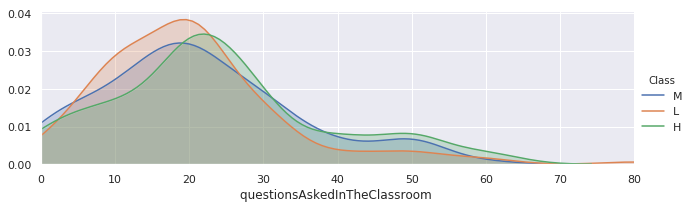

In [11]:
facet = sns.FacetGrid(data_frame, hue = "Class", aspect = 3)
facet.map(sns.kdeplot,"questionsAskedInTheClassroom ",shade= True)
facet.set(xlim=(0, data_frame["questionsAskedInTheClassroom "].max()))
facet.add_legend()

In [12]:
# X and y
Without_class_data_frame = data_frame.drop(columns=['Class'])
Without_class_data_frame.head(4)

,gender,nationality,placeOfBirth,department,batch,semester,section,lastSemesterGradePoint,questionsAskInTheClassroom,questionsAskedInTheClassroom,goThroughCourseMaterials,goThroughCourseMaterial,meetWithAcademicAdviser,groupStudyHours,studentAbsenceDays,parentsSatisfaction,educationStatusofParents
0,M,Bangladesh,Dhaka,SWE,16,Summer,A,3.66,M,10,L,24,3,10,5,Yes,Above HSC
1,M,Bangladesh,Munshiganj,SWE,17,Summer,B,2.25,M,8,M,118,4,30,19,Yes,Above HSC
2,M,Bangladesh,Cumilla,SWE,17,Spring,A,3.25,M,5,M,12,2,4,2,Yes,HSC
3,F,Bangladesh,Dhaka,SWE,18,Summer,B,3.50,M,2,M,11,2,3,7,No,Above HSC


In [13]:
# Get dummies
Without_class_data_frame = pd.get_dummies(Without_class_data_frame)

# data_frame head
Without_class_data_frame.head(2)

,batch,lastSemesterGradePoint,questionsAskedInTheClassroom,goThroughCourseMaterial,meetWithAcademicAdviser,groupStudyHours,studentAbsenceDays,gender_F,gender_M,nationality_Bangladesh,...,questionsAskInTheClassroom_M,goThroughCourseMaterials_H,goThroughCourseMaterials_L,goThroughCourseMaterials_M,parentsSatisfaction_No,parentsSatisfaction_Yes,parentsSatisfaction_Yes,educationStatusofParents_Above HSC,educationStatusofParents_HSC,educationStatusofParents_SSC
0,16,3.66,10,24,3,10,5,0,1,1,...,1,0,1,0,0,1,0,1,0,0
1,17,2.25,8,118,4,30,19,0,1,1,...,1,0,0,1,0,1,0,1,0,0


In [14]:

Class_data_frame = data_frame.drop(columns=['gender','batch','nationality',
                                            'department','semester',
                                            'section','lastSemesterGradePoint',
                                            'questionsAskInTheClassroom',
                                            'questionsAskedInTheClassroom ',
                                            'goThroughCourseMaterials',
                                            'goThroughCourseMaterial',
                                            'meetWithAcademicAdviser',
                                            'groupStudyHours',
                                            'studentAbsenceDays',
                                            'parentsSatisfaction','educationStatusofParents'])
Class_data_frame.head(3)

,placeOfBirth,Class
0,Dhaka,M
1,Munshiganj,L
2,Cumilla,L


In [15]:
Class_data_frame['Class'].unique()

array(['M', 'L', 'H'], dtype=object)

In [16]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  

# Encode labels in column 'species'. 
Class_data_frame['Class']= label_encoder.fit_transform(Class_data_frame['Class']) 
  
Class_data_frame['Class'].unique() 


array([2, 1, 0])

In [17]:
Class_data_frame = pd.DataFrame(Class_data_frame['Class'])
Class_data_frame.head(3)

,Class
0,2
1,1
2,1


In [18]:

final_data_frame = pd.concat([Without_class_data_frame, Class_data_frame], axis = 1)
final_data_frame.head(4)

,batch,lastSemesterGradePoint,questionsAskedInTheClassroom,goThroughCourseMaterial,meetWithAcademicAdviser,groupStudyHours,studentAbsenceDays,gender_F,gender_M,nationality_Bangladesh,...,goThroughCourseMaterials_H,goThroughCourseMaterials_L,goThroughCourseMaterials_M,parentsSatisfaction_No,parentsSatisfaction_Yes,parentsSatisfaction_Yes,educationStatusofParents_Above HSC,educationStatusofParents_HSC,educationStatusofParents_SSC,Class
0,16,3.66,10,24,3,10,5,0,1,1,...,0,1,0,0,1,0,1,0,0,2
1,17,2.25,8,118,4,30,19,0,1,1,...,0,0,1,0,1,0,1,0,0,1
2,17,3.25,5,12,2,4,2,0,1,1,...,0,0,1,0,1,0,0,1,0,1
3,18,3.50,2,11,2,3,7,1,0,1,...,0,0,1,1,0,0,1,0,0,2


In [19]:
final_data_frame.corr()

,batch,lastSemesterGradePoint,questionsAskedInTheClassroom,goThroughCourseMaterial,meetWithAcademicAdviser,groupStudyHours,studentAbsenceDays,gender_F,gender_M,nationality_Bangladesh,...,goThroughCourseMaterials_H,goThroughCourseMaterials_L,goThroughCourseMaterials_M,parentsSatisfaction_No,parentsSatisfaction_Yes,parentsSatisfaction_Yes,educationStatusofParents_Above HSC,educationStatusofParents_HSC,educationStatusofParents_SSC,Class
batch,1.000000,0.054141,0.092020,0.052573,-0.106342,0.013168,-0.144744,-0.023370,0.023370,0.169137,...,-0.048073,-0.006264,0.041619,0.037203,-0.033395,-0.014521,-0.019456,-0.025609,0.056574,0.096536
lastSemesterGradePoint,0.054141,1.000000,0.151437,0.072438,0.000417,0.001058,-0.031197,-0.017614,0.017614,-0.001175,...,0.173663,-0.060540,-0.088292,-0.047669,0.044179,0.012495,0.042449,-0.068720,0.021865,-0.025954
questionsAskedInTheClassroom,0.092020,0.151437,1.000000,0.256593,0.113385,0.133798,-0.019366,-0.118999,0.118999,0.071379,...,0.109463,-0.143077,0.022630,-0.048155,0.033125,0.063243,0.033457,-0.068904,0.034425,-0.047580
goThroughCourseMaterial,0.052573,0.072438,0.256593,1.000000,0.085755,0.497176,0.022326,-0.091188,0.091188,0.052621,...,0.198691,-0.149327,-0.041279,-0.143110,0.150481,-0.041016,-0.021281,-0.044878,0.081551,-0.026018
meetWithAcademicAdviser,-0.106342,0.000417,0.113385,0.085755,1.000000,0.146560,0.044956,0.033776,-0.033776,-0.063530,...,0.063355,-0.077161,0.008883,-0.080952,0.074763,0.022373,-0.043028,0.045056,0.006527,-0.017504
groupStudyHours,0.013168,0.001058,0.133798,0.497176,0.146560,1.000000,0.075167,-0.090196,0.090196,0.052320,...,0.203742,-0.079938,-0.096935,-0.093099,0.104941,-0.057690,-0.044659,-0.040046,0.108010,-0.038787
studentAbsenceDays,-0.144744,-0.031197,-0.019366,0.022326,0.044956,0.075167,1.000000,-0.079569,0.079569,0.021921,...,-0.004562,0.047034,-0.031587,0.059559,-0.066198,0.032785,0.035259,0.003073,-0.051989,-0.021161
gender_F,-0.023370,-0.017614,-0.118999,-0.091188,0.033776,-0.090196,-0.079569,1.000000,-1.000000,0.025692,...,-0.083839,-0.029771,0.086645,0.094642,-0.089182,-0.018347,0.013646,0.062824,-0.091999,0.054566
gender_M,0.023370,0.017614,0.118999,0.091188,-0.033776,0.090196,0.079569,-1.000000,1.000000,-0.025692,...,0.083839,0.029771,-0.086645,-0.094642,0.089182,0.018347,-0.013646,-0.062824,0.091999,-0.054566
nationality_Bangladesh,0.169137,-0.001175,0.071379,0.052621,-0.063530,0.052320,0.021921,0.025692,-0.025692,1.000000,...,-0.123779,0.020563,0.079783,0.008341,0.015706,-0.105306,0.105010,-0.092514,-0.036273,0.089803


In [20]:
X = final_data_frame.iloc[:,:-1]
y = final_data_frame.iloc[:,-1:]   

dfcolumns =pd.DataFrame(final_data_frame.columns) 
#chi2
bestfeatures = SelectKBest(score_func=sklearn_chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)


#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Chi2 Weights']
# print(featureScores.nlargest(len(data_frame.columns),'Score'))

# featureScores.plot(kind='bar', subplots=True, figsize=(20,20))
featureScores = featureScores.sort_values(by=['Chi2 Weights'], ascending=False)
display(featureScores)
display(featureScores.shape)

,Specs,Chi2 Weights
3,goThroughCourseMaterial,72.046270
6,studentAbsenceDays,46.797132
0,batch,39.071508
2,questionsAskedInTheClassroom,36.148678
5,groupStudyHours,9.818743
120,department_ESDM,6.441762
38,placeOfBirth_Feni,5.978561
10,nationality_Nigeria,5.574314
23,placeOfBirth_Bosasosomalia,4.771242
146,questionsAskInTheClassroom_H,4.739952


(159, 2)

In [21]:
# Random Forest
rf = RandomForestRegressor()
rf.fit(X, y)
#print("Features sorted by their score:")
#featureScores2 = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_)), reverse=True)


dfscoresOfRF = pd.DataFrame(rf.feature_importances_)
dfscoresOfRF.columns = ['Random Forest Importance']
dfscoresOfRF = dfscoresOfRF.sort_values(by='Random Forest Importance', ascending=False)



#concat two dataframes for better visualization 
featureScores = pd.concat([featureScores, dfscoresOfRF],axis=1)

#featureScores = featureScores.sort_Values(by='Score', ascending = False)
display(featureScores)
display(featureScores.shape)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


,Specs,Chi2 Weights,Random Forest Importance
0,batch,39.071508,0.060414
1,lastSemesterGradePoint,0.100282,0.128183
2,questionsAskedInTheClassroom,36.148678,0.090518
3,goThroughCourseMaterial,72.046270,0.104510
4,meetWithAcademicAdviser,0.356554,0.048415
5,groupStudyHours,9.818743,0.113501
6,studentAbsenceDays,46.797132,0.064703
7,gender_F,1.372595,0.003783
8,gender_M,0.543858,0.008030
9,nationality_Bangladesh,0.268803,0.001877


(159, 3)

# Training, Test Data Preparing considering top 10 features

In [22]:
feature_column_names = ['goThroughCourseMaterial','studentAbsenceDays','questionsAskedInTheClassroom ','batch', 'groupStudyHours',
                        'department_ESDM', 'placeOfBirth_Feni', 'nationality_Nigeria', 'placeOfBirth_Bosasosomalia', 
                        'questionsAskInTheClassroom_H']
                        
predicted_class_name = ['Class']

# Getting feature variable values
X = final_data_frame[feature_column_names].values
y = final_data_frame[predicted_class_name].values

# Saving 30% for testing
split_test_size = 0.30

# Splitting using scikit-learn train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)

In [23]:
X_train = X_train.T
y_train = y_train.T
X_test = X_test.T
y_test = y_test.T

In [24]:
print("{0:0.2f}% in training set".format((len(X_train)/len(data_frame.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(data_frame.index)) * 100))

1.93% in training set
1.93% in test set


# Decision Tree

In [25]:
accuracies = {}

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train.T,y_train.T)

accu = clf.score(X_test.T,y_test.T)*100
accuracies['Decision Tree'] = accu

#Predict the response for test dataset
x_pred = clf.predict(X_train.T)

#Predict the response for test dataset
y_pred = clf.predict(X_test.T)

In [26]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train.T, x_pred))

Accuracy: 0.988950276243094


In [27]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test.T, y_pred))

Accuracy: 0.3974358974358974


# GaussianNB

In [28]:
# create GaussianNBr model object and train it with the data
from sklearn.naive_bayes import GaussianNB
nb_model= GaussianNB()
nb_model.fit(X_train.T, y_train.T.ravel())  # ravel() return 1-D array

accu = nb_model.score(X_test.T,y_test.T)*100
accuracies['Naive Bayes'] = accu

In [29]:
# performance metrics library
from sklearn import metrics

# get current accuracy of the model
prediction_from_trained_data = nb_model.predict(X_train.T)

accuracy = metrics.accuracy_score(y_train.T, prediction_from_trained_data)

print ("Accuracy of our GaussianNB model is : {0:.4f}".format(accuracy))

Accuracy of our GaussianNB model is : 0.5442


In [30]:
# this returns array of predicted results from test_data
prediction_from_test_data = nb_model.predict(X_test.T)

accuracy = metrics.accuracy_score(y_test.T, prediction_from_test_data)

print ("Accuracy of our GaussianNB model is: {0:0.4f}".format(accuracy))

Accuracy of our GaussianNB model is: 0.5321


In [31]:
print ("Accuracy of our GaussianNB model is: {0:0.4f} %".format(accuracy))

print ("Confusion Matrix")
print ("{0}".format(metrics.confusion_matrix(y_test.T, prediction_from_test_data, labels=[1, 0])))
print ("Classification Report")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test.T, prediction_from_test_data, labels=[1, 0])))

Accuracy of our GaussianNB model is: 0.5321 %
Confusion Matrix
[[4 1]
 [0 1]]
Classification Report
              precision    recall  f1-score   support

           1       0.57      0.09      0.15        45
           0       0.50      0.03      0.06        30

   micro avg       0.56      0.07      0.12        75
   macro avg       0.54      0.06      0.11        75
weighted avg       0.54      0.07      0.12        75



# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train.T, y_train.T.ravel())

accu = rf_model.score(X_test.T,y_test.T)*100
accuracies['Random Forest'] = accu

In [33]:
rf_predict_train = rf_model.predict(X_train.T)

rf_accuracy = metrics.accuracy_score(y_train.T, rf_predict_train)
print ("Accuracy: {0:.4f}".format(rf_accuracy))

Accuracy: 0.9669


In [34]:
rf_predict_test = rf_model.predict(X_test.T)

rf_accuracy_testdata = metrics.accuracy_score(y_test.T, rf_predict_test)
print ("Accuracy: {0:.4f}".format(rf_accuracy_testdata))

Accuracy: 0.4487


In [35]:
print ("Confusion Matrix for Random Forest")
print ("{0}".format(metrics.confusion_matrix(y_test.T, rf_predict_test, labels=[1, 0])))
print ("")
print ("Classification Report\n")
print ("{0}".format(metrics.classification_report(y_test.T, rf_predict_test, labels=[1, 0])))

Confusion Matrix for Random Forest
[[18  4]
 [ 9  5]]

Classification Report

              precision    recall  f1-score   support

           1       0.38      0.40      0.39        45
           0       0.22      0.17      0.19        30

   micro avg       0.33      0.31      0.32        75
   macro avg       0.30      0.28      0.29        75
weighted avg       0.32      0.31      0.31        75



# KNN

In [36]:
# loading library
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train.T, y_train.T.ravel())

accu = knn.score(X_test.T,y_test.T)*100
accuracies['KNN'] = accu

# predict the train response
x_pred = knn.predict(X_train.T)

# predict the test response
y_pred = knn.predict(X_test.T)

In [37]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train.T, x_pred))

Accuracy: 0.638121546961326


In [38]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test.T, y_pred))

Accuracy: 0.4166666666666667


In [39]:
knn_predict_test = knn.predict(X_test.T)
knn_accuracy_testdata = metrics.accuracy_score(y_test.T, knn_predict_test)
print ("Accuracy: {0:.4f}".format(knn_accuracy_testdata))
print ("Confusion Matrix for KNN Classifier")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test.T, knn_predict_test, labels=[1, 0])))
print ("")
print ("Classification Report\n")
print ("{0}".format(metrics.classification_report(y_test.T, knn_predict_test, labels=[1, 0])))

Accuracy: 0.4167
Confusion Matrix for KNN Classifier
[[15  7]
 [ 5  5]]

Classification Report

              precision    recall  f1-score   support

           1       0.35      0.33      0.34        45
           0       0.20      0.17      0.18        30

   micro avg       0.29      0.27      0.28        75
   macro avg       0.27      0.25      0.26        75
weighted avg       0.29      0.27      0.28        75



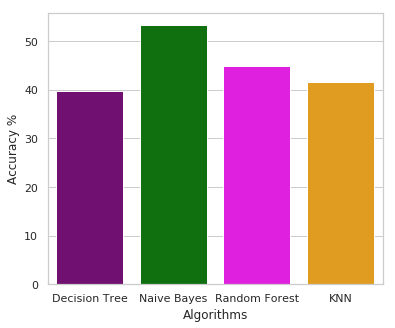

In [40]:
colors = ["purple", "green", "magenta", "orange"]

sns.set_style("whitegrid")
plt.figure(figsize=(6,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

# Training, Test Data Preparing considering top 4 features

In [41]:
feature_column_names = ['goThroughCourseMaterial','studentAbsenceDays','questionsAskedInTheClassroom ','batch']
                        
predicted_class_name = ['Class']

# Getting feature variable values
X = final_data_frame[feature_column_names].values
y = final_data_frame[predicted_class_name].values

# Saving 30% for testing
split_test_size = 0.30

# Splitting using scikit-learn train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)

In [42]:
X_train = X_train.T
y_train = y_train.T
X_test = X_test.T
y_test = y_test.T

In [43]:
print("{0:0.2f}% in training set".format((len(X_train)/len(data_frame.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(data_frame.index)) * 100))

0.77% in training set
0.77% in test set


# DT

In [44]:
accuracies = {}

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train.T,y_train.T)

accu = clf.score(X_test.T,y_test.T)*100
accuracies['Decision Tree'] = accu

#Predict the response for test dataset
x_pred = clf.predict(X_train.T)

#Predict the response for test dataset
y_pred = clf.predict(X_test.T)

In [45]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train.T, x_pred))

Accuracy: 0.9779005524861878


In [46]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test.T, y_pred))

Accuracy: 0.391025641025641


# GNB

In [47]:
# create GaussianNBr model object and train it with the data
from sklearn.naive_bayes import GaussianNB
nb_model= GaussianNB()
nb_model.fit(X_train.T, y_train.T.ravel())  # ravel() return 1-D array

accu = nb_model.score(X_test.T,y_test.T)*100
accuracies['Naive Bayes'] = accu

In [48]:
# performance metrics library
from sklearn import metrics

# get current accuracy of the model
prediction_from_trained_data = nb_model.predict(X_train.T)

accuracy = metrics.accuracy_score(y_train.T, prediction_from_trained_data)

print ("Accuracy of our GaussianNB model is : {0:.4f}".format(accuracy))

Accuracy of our GaussianNB model is : 0.5331


In [49]:
# this returns array of predicted results from test_data
prediction_from_test_data = nb_model.predict(X_test.T)

accuracy = metrics.accuracy_score(y_test.T, prediction_from_test_data)

print ("Accuracy of our GaussianNB model is: {0:0.4f}".format(accuracy))

Accuracy of our GaussianNB model is: 0.5321


# RF

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train.T, y_train.T.ravel())

accu = rf_model.score(X_test.T,y_test.T)*100
accuracies['Random Forest'] = accu

In [51]:
rf_predict_train = rf_model.predict(X_train.T)

rf_accuracy = metrics.accuracy_score(y_train.T, rf_predict_train)
print ("Accuracy: {0:.4f}".format(rf_accuracy))

Accuracy: 0.9558


In [52]:
rf_predict_test = rf_model.predict(X_test.T)

rf_accuracy_testdata = metrics.accuracy_score(y_test.T, rf_predict_test)
print ("Accuracy: {0:.4f}".format(rf_accuracy_testdata))

Accuracy: 0.4487


# KNN

In [53]:
# loading library
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train.T, y_train.T.ravel())

accu = knn.score(X_test.T,y_test.T)*100
accuracies['KNN'] = accu

# predict the train response
x_pred = knn.predict(X_train.T)

# predict the test response
y_pred = knn.predict(X_test.T)

In [54]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train.T, x_pred))

Accuracy: 0.6602209944751382


In [55]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test.T, y_pred))

Accuracy: 0.3782051282051282


# ANN

In [56]:
feature_column_names = ['goThroughCourseMaterial','studentAbsenceDays','questionsAskedInTheClassroom ','batch', 'groupStudyHours',
                        'department_ESDM', 'placeOfBirth_Feni', 'nationality_Nigeria', 'placeOfBirth_Bosasosomalia', 
                        'questionsAskInTheClassroom_H']
                        
predicted_class_name = ['Class']

# Getting feature variable values
X = final_data_frame[feature_column_names].values
y = final_data_frame[predicted_class_name].values

# Saving 30% for testing
split_test_size = 0.30


# Splitting using scikit-learn train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)

In [57]:
print("{0:0.2f}% in training set".format((len(X_train)/len(data_frame.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(data_frame.index)) * 100))

69.88% in training set
30.12% in test set


In [58]:
print(feature_column_names)

['goThroughCourseMaterial', 'studentAbsenceDays', 'questionsAskedInTheClassroom ', 'batch', 'groupStudyHours', 'department_ESDM', 'placeOfBirth_Feni', 'nationality_Nigeria', 'placeOfBirth_Bosasosomalia', 'questionsAskInTheClassroom_H']


In [59]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras
from keras import backend as K
from keras.layers import Activation
from keras.metrics import categorical_crossentropy

Using TensorFlow backend.


In [60]:
print(len(feature_column_names))
test_columns = len(feature_column_names)
print(test_columns)

10
10


In [61]:
acc =0
j= 0
test_columns = len(feature_column_names)
featureNo = 10

while j < test_columns:
    # Initialising the ANN
    # Initialising the ANN
  print(feature_column_names)
  classifier = Sequential()

# Adding the input layer and the first hidden layer
  classifier.add(Dense(units = 70, kernel_initializer = 'uniform', activation = 'relu', input_dim = featureNo))

# Adding the second hidden layer
  classifier.add(Dense(units = 66, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the third hidden layer
  classifier.add(Dense(units = 60, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the fourth hidden layer
  classifier.add(Dense(units = 56, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the fifth hidden layer
  classifier.add(Dense(units = 48, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
  classifier.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
  classifier.compile(Adam(lr=.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
  classifier.fit(X_train, y_train, batch_size =45 , epochs = 800)
  
  

  # Predicting the Test set results
  predictions = classifier.predict(X_test)
  
  for p in predictions:
    print(p)

  accuracy = (predictions[0][0]+predictions[1][1])/(predictions[0][0]+predictions[0][1]+predictions[1][0]+predictions[1][1])
  acc = str(accuracy*100)
  print("Accuracy: "+ acc+"%")
    
  
  
    
  print(featureNo)
  print(feature_column_names)
  feature_column_names.pop()
  featureNo -= 1
  print(featureNo)
  X = final_data_frame[feature_column_names].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
  j += 1
  
    


['goThroughCourseMaterial', 'studentAbsenceDays', 'questionsAskedInTheClassroom ', 'batch', 'groupStudyHours', 'department_ESDM', 'placeOfBirth_Feni', 'nationality_Nigeria', 'placeOfBirth_Bosasosomalia', 'questionsAskInTheClassroom_H']
Epoch 1/800
362/362 [==============================] - 1s 2ms/step - loss: 1.0977 - acc: 0.4751
Epoch 2/800
362/362 [==============================] - 0s 56us/step - loss: 1.0931 - acc: 0.5249
Epoch 3/800
362/362 [==============================] - 0s 54us/step - loss: 1.0683 - acc: 0.5249
Epoch 4/800
362/362 [==============================] - 0s 52us/step - loss: 1.0252 - acc: 0.5249
Epoch 5/800
362/362 [==============================] - 0s 56us/step - loss: 1.0259 - acc: 0.5249
Epoch 6/800
362/362 [==============================] - 0s 52us/step - loss: 1.0242 - acc: 0.5249
Epoch 7/800
362/362 [==============================] - 0s 51us/step - loss: 1.0188 - acc: 0.5249
Epoch 8/800
362/362 [==============================] - 0s 50us/step - loss: 1.0189 - a

In [62]:
data_frame.head()

,gender,nationality,placeOfBirth,department,batch,semester,section,lastSemesterGradePoint,questionsAskInTheClassroom,questionsAskedInTheClassroom,goThroughCourseMaterials,goThroughCourseMaterial,meetWithAcademicAdviser,groupStudyHours,studentAbsenceDays,parentsSatisfaction,educationStatusofParents,Class
0,M,Bangladesh,Dhaka,SWE,16,Summer,A,3.66,M,10,L,24,3,10,5,Yes,Above HSC,M
1,M,Bangladesh,Munshiganj,SWE,17,Summer,B,2.25,M,8,M,118,4,30,19,Yes,Above HSC,L
2,M,Bangladesh,Cumilla,SWE,17,Spring,A,3.25,M,5,M,12,2,4,2,Yes,HSC,L
3,F,Bangladesh,Dhaka,SWE,18,Summer,B,3.50,M,2,M,11,2,3,7,No,Above HSC,M
4,M,Bangladesh,Faridpur,SWE,26,Summer,A,3.88,M,30,M,80,6,5,7,Yes,Above HSC,M


In [63]:
from keras.models import load_model

classifier.save('student_prediction_model.h5') #Save trained ANN

# ANN with Four Feature (DIU)